In [2]:
# import time
import imutils
import numpy as np
import cv2

In [3]:
class hogObject:
    detector = cv2.HOGDescriptor()
    def __init__(self):
        self.detector.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hog = hogObject()

In [4]:
imageList = []
cap = cv2.VideoCapture('livedata.mp4')
ret, image = cap.read()
while ret:
    ret,image = cap.read()
    imageList.append(image)
len(imageList)

118

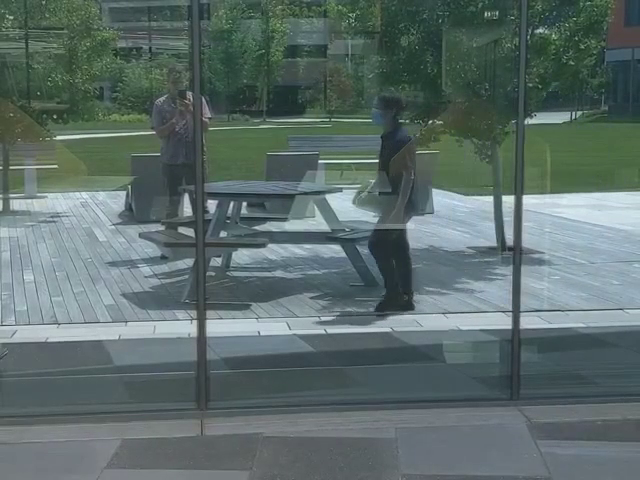

In [8]:
from PIL import Image
image_rgb = cv2.cvtColor(imageList[42], cv2.COLOR_BGR2RGB)
Image.fromarray(image_rgb)

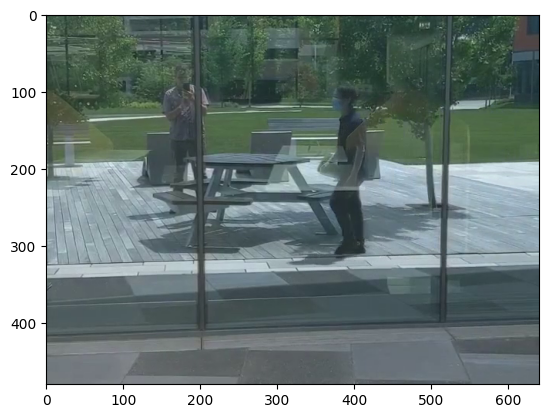

In [5]:
import matplotlib.pyplot as plt
image_rgb = cv2.cvtColor(imageList[42], cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [9]:
image = np.asarray(image_rgb)
image = imutils.resize(image, width=min(400, image.shape[1]))
image

array([[[ 63,  88,  70],
        [ 56,  81,  63],
        [ 59,  84,  66],
        ...,
        [ 44,  66,  78],
        [ 44,  66,  78],
        [ 38,  60,  72]],

       [[ 64,  89,  71],
        [ 58,  83,  65],
        [ 60,  85,  67],
        ...,
        [ 44,  66,  78],
        [ 44,  66,  78],
        [ 38,  60,  72]],

       [[ 65,  90,  72],
        [ 63,  88,  70],
        [ 62,  86,  68],
        ...,
        [ 44,  66,  78],
        [ 44,  66,  78],
        [ 38,  60,  72]],

       ...,

       [[116, 122, 125],
        [116, 122, 125],
        [116, 122, 125],
        ...,
        [102, 112, 118],
        [102, 112, 118],
        [102, 112, 118]],

       [[116, 122, 125],
        [116, 122, 125],
        [116, 122, 125],
        ...,
        [102, 112, 118],
        [102, 112, 118],
        [102, 112, 118]],

       [[116, 122, 125],
        [116, 122, 125],
        [116, 122, 125],
        ...,
        [102, 112, 118],
        [102, 112, 118],
        [102, 112, 118]]

In [24]:
image = np.asarray(image_rgb)
# Compute the ratio of the new width to the old width
ratio = image.shape[0] / image.shape[1]
# Compute the new height while maintaining the aspect ratio
new_height = int(400 * ratio)
image = cv2.resize(image, (400,new_height))
image

array([[[ 64,  89,  71],
        [ 55,  80,  62],
        [ 59,  84,  66],
        ...,
        [ 44,  66,  78],
        [ 45,  67,  79],
        [ 38,  60,  72]],

       [[ 65,  90,  72],
        [ 57,  82,  64],
        [ 60,  85,  67],
        ...,
        [ 44,  66,  78],
        [ 45,  67,  79],
        [ 38,  60,  72]],

       [[ 65,  90,  72],
        [ 63,  88,  70],
        [ 62,  87,  69],
        ...,
        [ 45,  67,  79],
        [ 45,  67,  79],
        [ 38,  60,  72]],

       ...,

       [[116, 122, 125],
        [116, 122, 125],
        [116, 122, 125],
        ...,
        [102, 112, 118],
        [102, 112, 118],
        [102, 112, 118]],

       [[116, 122, 125],
        [116, 122, 125],
        [116, 122, 125],
        ...,
        [102, 112, 118],
        [102, 112, 118],
        [102, 112, 118]],

       [[116, 122, 125],
        [116, 122, 125],
        [116, 122, 125],
        ...,
        [102, 112, 118],
        [102, 112, 118],
        [102, 112, 118]]

In [25]:
image_rgb.shape,image.shape

((480, 640, 3), (300, 400, 3))

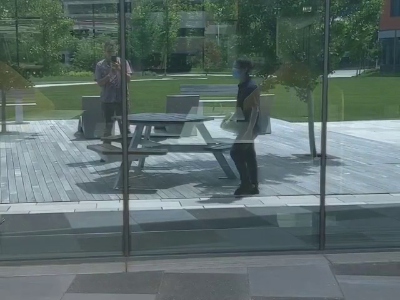

In [26]:
Image.fromarray(image)

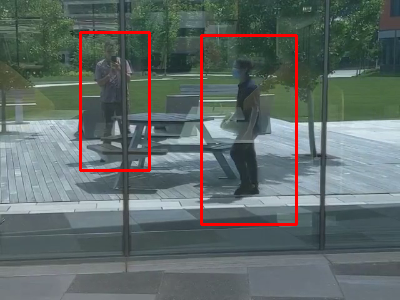

In [29]:
def detectHumanFromFrame(image, hog):
    image = np.asarray(image)
    # image = imutils.resize(image, width=min(400, image.shape[1]))
    ratio = image.shape[0] / image.shape[1]
    # Compute the new height while maintaining the aspect ratio
    new_height = int(400 * ratio)
    image = cv2.resize(image, (400,new_height))

    # Detecting all the regions in the Image that has a pedestrians inside it
    (regions, _) = hog.detector.detectMultiScale(
        image, winStride=(4, 4), padding=(4, 4), scale=1.05)

    # Drawing the regions in the image
    for (x, y, w, h) in regions:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
        
    return  image 

img = detectHumanFromFrame(imageList[42],hog)
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(image_rgb)
Image.fromarray(image_rgb)